# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Loading Dataset

In [2]:
df = pd.read_csv('''C:\\Users\\CN\\Desktop\\Himanshu\\2221486-Datasets\\Capstone+Project+1\\Corona_Project.csv''')

C:\Users\CN\AppData\Local\Temp\ipykernel_4464\661536493.py:1: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('''C:\\Users\\CN\\Desktop\\Himanshu\\2221486-Datasets\\Capstone+Project+1\\Corona_Project.csv''')


# Data Exploration

In [3]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [4]:
df.shape

(278848, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [6]:
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

# Data Cleaning 

In [7]:
#Filling null values

Cough_symptoms_mode = df['Cough_symptoms'].mode()[0]
df['Cough_symptoms'].fillna(Cough_symptoms_mode, inplace=True)
Fever_mode = df['Fever'].mode()[0]
df['Fever'].fillna(Fever_mode, inplace=True)
Sore_throat_mode = df['Sore_throat'].mode()[0]
df['Sore_throat'].fillna(Sore_throat_mode, inplace=True)
Shortness_of_breath_mode = df['Shortness_of_breath'].mode()[0]
df['Shortness_of_breath'].fillna(Shortness_of_breath_mode, inplace=True)
Headache_mode = df['Headache'].mode()[0]
df['Headache'].fillna(Headache_mode, inplace=True)


In [8]:
#convert boolean values into str
df['Cough_symptoms'] = df['Cough_symptoms'].astype(str)
df['Fever'] = df['Fever'].astype(str)
df['Sore_throat'] = df['Sore_throat'].astype(str)
df['Shortness_of_breath'] = df['Shortness_of_breath'].astype(str)
df['Headache'] = df['Headache'].astype(str)

# Exploratory Data Analysis

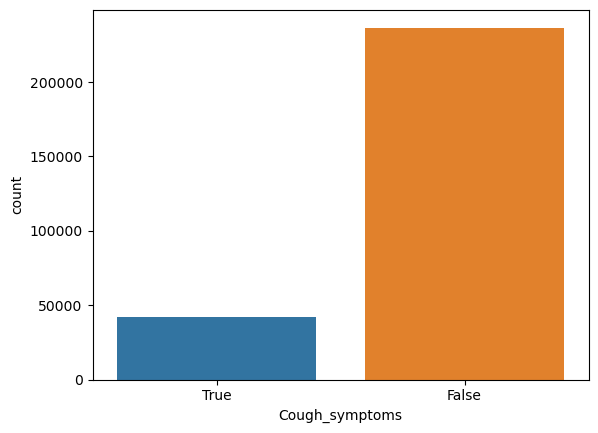

In [9]:
sns.countplot(x='Cough_symptoms', data=df)
plt.show()


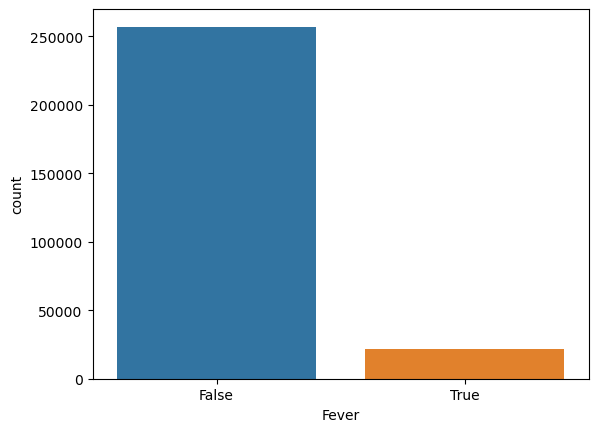

In [10]:
sns.countplot(x='Fever', data=df)
plt.show()

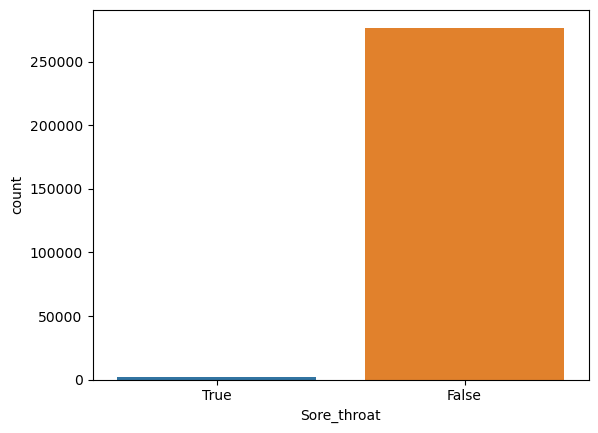

In [11]:
sns.countplot(x='Sore_throat', data=df)
plt.show()

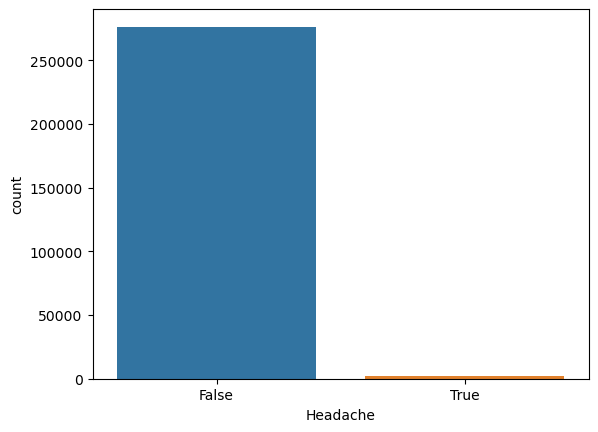

In [12]:
sns.countplot(x='Headache', data=df)
plt.show()

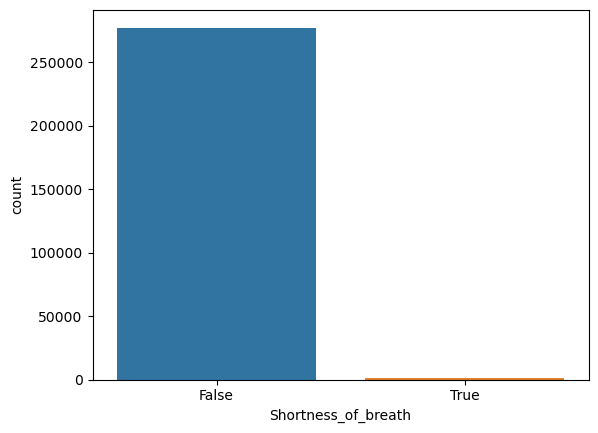

In [13]:
sns.countplot(x='Shortness_of_breath', data=df)
plt.show()

# Features_Encoding

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274956 entries, 0 to 278847
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Cough_symptoms_en       274956 non-null  int64  
 1   Fever_en                274956 non-null  int64  
 2   Sore_throat_en          274956 non-null  int64  
 3   Shortness_of_breath_en  274956 non-null  int64  
 4   Headache_en             274956 non-null  int64  
 5   corona_en               274956 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 14.7 MB


In [15]:
label_mapping = {'True': 0, 'False': 1,}
df['Cough_symptoms_en'] = df['Cough_symptoms'].map(label_mapping)

In [16]:
label_mapping = {'True': 0, 'False': 1,}
df['Fever_en'] = df['Fever'].map(label_mapping)
label_mapping = {'True': 0, 'False': 1,}
df['Sore_throat_en'] = df['Sore_throat'].map(label_mapping)
label_mapping = {'True': 0, 'False': 1,}
df['Shortness_of_breath_en'] = df['Shortness_of_breath'].map(label_mapping)
label_mapping = {'True': 0, 'False': 1,}
df['Headache_en'] = df['Headache'].map(label_mapping)

In [17]:
label_mapping = {'negative': 0, 'positive': 1,}
df['corona_en'] = df['Corona'].map(label_mapping)

In [18]:
df = df.dropna(subset=['corona_en'])

In [19]:
df.drop(df.columns[0:11], axis=1, inplace=True)

In [20]:
df.head()

,Cough_symptoms_en,Fever_en,Sore_throat_en,Shortness_of_breath_en,Headache_en,corona_en
0,0,1,0,1,1,0.0
1,1,0,1,1,1,1.0
2,1,0,1,1,1,1.0
3,0,1,1,1,1,0.0
4,0,1,1,1,1,0.0


In [21]:
#specify input and output attributes

X = df.drop(columns=['corona_en'], axis=1)
y = df['corona_en']

# Spliting train_test 

In [30]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

# Training the Model

In [31]:
#classify the model
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
    model.fit(x_train,y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    #cross validation - it is for better validation of model 
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 95.5920861216177
Cross validation is 95.62948195051275


# Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 95.66846086703521
Cross validation is 95.71967852813452


# RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model  = RandomForestClassifier()
classify(model, X, y)

Accuracy is 95.66846086703521
Cross validation is 95.71967852813452


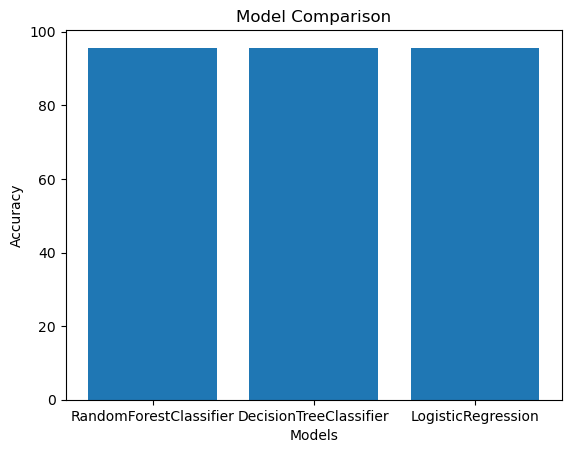

In [37]:
model_names = ['RandomForestClassifier', 'DecisionTreeClassifier', 'LogisticRegression']
accuracy_scores = [95.66846086703521, 95.66846086703521, 95.5920861216177]
# Create a bar graph
plt.bar(model_names, accuracy_scores)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')

# Show the plot
plt.show()